# 1.2 Erros nas aproximações numéricas

Uma solução numérica é geralmente uma solução aproximada, não exata. A diferença entre a solução exata e a solução aproximada é chamada de erro e é muitas vezes inerente ao processo. Em problemas reais, erros numéricos raramente podem ser evitados. 

Os erros podem ocorrer na fase de modelagem matemática, devido a simplificações e a imprecisão nos dados, quanto na fase de resolução, no processo de conversão de base e devido à limitações da máquina em armazenar um número muito grande de dígitos. Ou também, na aproximação de funções representadas por séries infinitas. Como não é possível realizar a soma infinita, então, as série são truncadas e considera-se apenas um número finito de termos, introduzindo o que chamamos de **erro de truncamento**.

Sabemos também que o computador realiza operações aritméticas retendo apenas um número um número fixo de algarismos significativos. Números como o $\pi$, $e$ ou $\sqrt{7}$ não podem ser expressos por um número fixo de algarismos, portanto não podem ser representtados exatamente por um computador. Além disso, alguns números que têm representação fracionária finita no sistema decimal, não podem ser representados com exatidão no sistema binário. A discrepância introduzida pela omissão de algarismos significativos é chamada **erro de arredondamento**. 


**Arredondamento:** Dizemos que um número $n_r$ na base decimal foi arredondado na posição $k$ se todos os dígitos de ordem maior que $k$ forem descartados segundo o seguinte critério:

 - O dígito de ordem $k$ é acrescido de uma unidade se o de ordem $(k + 1)$ for maior ou igual a metade da base
 - do contrário, o número $nr$ é representado com os $k$ dígitos iniciais.


**Exemplo 1:**

Consideremos o sistema $ SPF (b, n, exp_{min} , exp_{max}) = SPF (10, 4, -5, 5) $

a) Se $a=0,5324 \times 10^3$ e $b=0,4212 \times 10^{-2}$, então $a \times b = 0,22424688 \times 10^1$, que é arredondado e armazenado como $a \times b = 0,2242 \times 10^1 = 2,242$.

b) Se $a=0,5324 \times 10^3$ e $b=0,1237 \times 10^{2}$, então $a + b = 0,54477 \times 10^3$, que é arredondado e armazenado como $a + b = 0,5448 \times 10^3=544,8$.

Usando Python, podemos reproduzir o os resultados acima fazendo:

In [1]:
#a)
a = 0.5324*10**3
b = 0.4212*10**-2
print('Exato:',a*b)


Exato: 2.2424688


In [2]:
print('Arredondado:',round(0.22424688, 4)*10**1)

Arredondado: 2.242


In [3]:
#b)
a = 0.5324*10**3
b = 0.1237*10**2
print('Exato:',a+b)

Exato: 544.77


In [4]:
print('Arredondado:',round(0.54477, 4)*10**3)

Arredondado: 544.8


**Exemplo 2:**  Neste exemplo vamos calcular o polinômio $y=x^3-5x^2+6x+0,55$em $x = 1,37$ usando aritmética de ponto flutuante com 3 algarismos significativos. 
Em seguida, vamos repetir os cálculos expressando $y$ como $y = ((x – 5)x + 6)x + 0,55$ e comparar.

In [5]:
x = 1.37
print('x³=',x**3)
print('x²=',x**2)

x³= 2.5713530000000007
x²= 1.8769000000000002


In [6]:
print('5x²=',5*1.88)

5x²= 9.399999999999999


In [7]:
6*x

8.22

In [8]:
y = (0.257 - 0.94 + 0.822 + 0.055)*10
print('Letra a: y=', y)

Letra a: y= 1.94


In [9]:
ye = x**3 - 5*x**2 + 6*x+ 0.55
print('Valor exato: y=',ye)

Valor exato: y= 1.956853


In [10]:
print('Erro letra a:', abs(y-ye))

Erro letra a: 0.016853000000000007


In [11]:
y = round((round((x-5)*x,2)+6)*x,2)+0.55
print('Letra b: y=', y)

Letra b: y= 1.96


In [12]:
print('Erro letra b:', abs(y-ye))

Erro letra b: 0.003147000000000011


**Truncamento:** Quando representamos uma função utilizando uma série infinita mas considerarmos apenas um número finito de termos na série, dizemos que estamos cometendo um erro de truncamento.

**Exemplo 3:** A função exponencial $e^x$ pode ser representada pela série

$$e^x=\sum_{n=0}^{\infty} \frac{x^n}{n!}.$$
                                   
Sabemos que $e$ é um número irracional e portanto sua representação fracionária têm infinitas casas decimais. Podemos obter uma aproximação para o número $e$ truncando a série 


$$e=\sum_{n=0}^{\infty} \frac{1}{n!} = 1+\frac{1}{2}+\frac{1}{3!}+\frac{1}{4!}+...$$
Por exemplo, com 5 termos da série obtemos:

In [13]:
e = 1+1/2+1/6+1/24+1/120
print ('Valor aproximado:',e)

Valor aproximado: 1.7166666666666668


In [14]:
import math
print ('Valor "exato":', math.e)

Valor "exato": 2.718281828459045


**Exercício:** A função seno pode ser representada pela série de Maclaurin, fazendo
$$
\sin x=\sum_{n=0}^{\infty} \frac{(-1)^n}{(2 n+1)!} x^{2 n+1}
$$

Encontre aproximações para $\sin(\pi/4)$ com 3, 5 e 20 termos.

In [6]:
import math
x = math.pi / 4

result = 0
for n in range(0, 3):
    result += ((-1)**n / math.factorial(2*n + 1)) * x**(2*n + 1)

expected_result = math.sin(x)
abs_error = abs(expected_result - result)

print(f"sin(pi/4): {result}")
print(f"sqrt(2)/2: {expected_result}")
print(f"Erro absoluto: {abs_error}")
print(f"Erro relativo: {(abs_error/expected_result)*100}%")

sin(pi/4): 0.7071430457793603
sqrt(2)/2: 0.7071067811865475
Erro absoluto: 3.626459281280692e-05
Erro relativo: 0.005128587898980941%


### Erro absoluto
Definimos erro absoluto por

$$ E_{abs} = \left| a_{ex}-a_{aprox} \right| $$

em que $a_{ex}$ é o valor exato da grandeza considerada e $a_{aprox}$ é o valor aproximado da mesma grandeza numérica.

### Erro relativo 
Definimos erro relativo por

$$ E_{rel} = \frac{E_{abs} }{\left| a_{ex} \right|} $$

em que $a_{ex}$ é o valor exato da grandeza considerada e $a_{aprox}$ é o valor aproximado da mesma grandeza.

Podemos observar que o erro relativo nos fornece mais informações sobre a qua- lidade do erro que estamos cometendo num determinado cálculo, uma vez que no erro absoluto não é levada em consideração a ordem de grandeza do valor calculado, enquanto no erro relativo esta ordem é contemplada.

Quando obtemos uma aproximação numérica por meio de uma sequência convergete $x_0, x_1, x_2,...,x_k,...$mas não conhecemos a solução exata, o erro relativo no termo $k$ pode ser expresso como _diferença relativa_, dada por  

$$ \frac{\left|x_{k-1}-x_k \right|}{\left| x_k \right|} $$


**Exemplo:**
A equação $f(x)=x^2-a=0$, com $a>0$, podemos utilizar o seguinte processo iterativo:

$$ x_{n+1}=\frac{1}{2} \left( x_n + \frac{a}{x_n} \right), \,\,\, n=1,2,...$$

A partir de uma aproximação inicial $x_0$, usamos essa expressão para gerar a sequência de soluções aproximadas $x_1$, $x_2$, ...

Assim, por exemplo, para calcular aproximações para $\sqrt{2}$, podemos fazer

$ x_0 = 1.5 $

$ x_1 = 1/2(1.5 + 2/1.5) = 1.4166666666666665 $

$x_2 = 1/2(1.4166666666666665 + 2/1.4166666666666665) = 1.4142156862745097 $

E assim por diante.

Em Python podemos fazer:

In [23]:
x = 1.0
x_ant = 0.0

err = 10.0

while err>0.0001:
    x = 0.5*(x + 2/x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print (x, err)

3.0 1.0
2.3333333333333335 0.28571428571428564
2.238095238095238 0.04255319148936175
2.2360688956433634 0.0009062075215225861
2.236067977499978 4.10606204533442e-07


**Exercício:** Usando o exemplo acima, encontre o valor de $\sqrt{3}$ com um erro relativo mentor que $10^{-5}$. Quantas iterações são necessárias fazendo $x_0=1$? O número de iterações diminui se fizermos $x_0=1.5$?

In [34]:
x = 1
x_prev = 0
err = 1
n = 0

while err > 1e-5:
    x = 0.5*(x + 3/x)
    err = abs(x - x_prev) / abs(x)
    x_prev = x
    n += 1
    print(x, err, n)

2.0 1.0 1
1.75 0.14285714285714285 2
1.7321428571428572 0.010309278350515427 3
1.7320508100147274 5.314343412884141e-05 4
1.7320508075688772 1.4121122650442792e-09 5


**Exemplo:**

A sequência $x_k = 1+ \frac{1}{x_{k-1}}$ converge para $\overline{x} = \frac{1+\sqrt{5}}{2}$. Fazendo $i = 0,1,2,...,10$ e $x_0 = 1$, mostre a sequência de aproximações juntamente com as diferenças relativas e os erros relativos para cada termo.

In [23]:
import math
x = 1.
x_ant = x
x_exa = (1+math.sqrt(5))/2

for k in range(10):
    x = 1.+1./x
    dif = abs(x-x_ant)/abs(x)
    err = abs(x-x_exa)/abs(x_exa)
    print (f"Approx: {x}, diff: {dif}, err: {err}")
    x_ant = x

Approx: 2.0, diff: 0.5, err: 0.23606797749978967
Approx: 1.5, diff: 0.3333333333333333, err: 0.07294901687515776
Approx: 1.6666666666666665, diff: 0.09999999999999992, err: 0.030056647916491288
Approx: 1.6, diff: 0.04166666666666652, err: 0.01114561800016822
Approx: 1.625, diff: 0.01538461538461533, err: 0.004305231718579094
Approx: 1.6153846153846154, diff: 0.005952380952380931, err: 0.0016374027886314115
Approx: 1.619047619047619, diff: 0.002262443438914019, err: 0.0006264579760202099
Approx: 1.6176470588235294, diff: 0.0008658008658008628, err: 0.0002391358457583512
Approx: 1.6181818181818182, diff: 0.00033046926635820254, err: 9.136361346616536e-05
Approx: 1.6179775280898876, diff: 0.00012626262626264404, err: 3.48946069117676e-05


**Exercício:** A função cosseno pode ser representada pela série de Maclaurin, fazendo
$$
\cos x=\sum_{n=0}^{\infty} \frac{(-1)^n}{(2 n)!} x^{2 n}.
$$
Descubra quantos termos da série são necessários para obter uma aproximação para $\cos(\pi/6)$ com erro relativo menor que $10^4$.

In [44]:
cos_x = 0
x = math.pi/6
x_ant = 0
err = 1
n = 0

while err > 1e-4:
    cos_x += ((-1)**n / math.factorial(2*n)) * x**(2*n)
    err = abs(cos_x -x_ant) / abs(cos_x)
    x_ant = cos_x
    n += 1

print(f"valor aproxx: {cos_x}, com um erro relativo de {err*100}%, que levou {n} iterações")


valor aproxx: 0.8660252641005711, com um erro relativo de 0.0033046743972051%, que levou 4 iterações


**Exercício:** Sabendo que a função $ln(1+x)$ pode ser representada pela série de Maclaurin, fazendo
$$
\ln (1+x)=\sum_{n=0}^{\infty} \frac{(-1)^n}{n+1} x^{n+1} \quad \text { para }|x|<1
$$

Descubra quantos termos da série são necessários para obter uma aproximação para $ln(0.2)$ com erro relativo menor que $10^4$.

In [7]:
import math

ln_02 = 0
x = -0.8
x_ant = 0
err = 1
n = 0

while err > 1e-4:
    ln_02 += ((-1)**n / (n+1)) * x**(n+1)
    err = abs(ln_02 - x_ant) / abs(ln_02)
    x_ant = ln_02
    n += 1

print(f"valor aproxx: {ln_02}, com um erro relativo de {err*100}%, que levou {n} iterações")
print(math.log(0.2))


valor aproxx: -1.6089250020106074, com um erro relativo de 0.009392341300123553%, que levou 25 iterações
-1.6094379124341003


**Exercício:** Podemos obter uma aproximação para a derivada primeira de uma função $y=f(x)$ usando a fórmula:

$$ \frac{dy}{dx} \cong \frac{\Delta y}{\Delta x} = \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

tomando um valor pequeno de $\Delta x$. 

Encontre uma aproximação para a derivada de $f(x)=2^xsen(x)$ em $x=1,23$ e calcule o erro relativo.



In [20]:
import sys

x = 1.23
true_val = 2.3164
del_x = 1e-10

dy_dx = ((2**(x+del_x) * math.sin(x+del_x)) - (2**(x) * math.sin(x))) / del_x

print(f"Aprox: {dy_dx}")
print(f"Erro relativo: {(abs(dy_dx - true_val) / true_val)*100}%")


Aprox: 2.316400404822616
Erro relativo: 1.747636920729587e-05%


**Exemplo:** Sabemos que a derivada primeira de $f(x)=sen(x)$ é $f'(x)=cos(x)$. Vamos calcular as derivadas numericamente para deversos pontos no intervalo $[0,2\pi]$ e fazer o gráfico.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

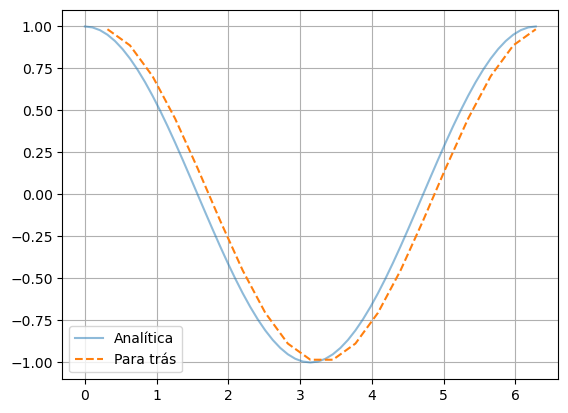

In [18]:
xi = np.linspace(0, 2*np.pi, 21)
h=(xi[-1]-xi[0])/(len(xi)-1)
f = lambda x: np.sin(x)

dxi = (f(xi[1:])-f(xi[0:-1]))/h

xplot = np.linspace(0, 2*np.pi, 61)

plt.plot(xplot,np.cos(xplot),'-',
         alpha=0.5,label='Analítica')
plt.plot(xi[1:],dxi,'--',label='Para trás')

plt.grid()
plt.legend()
plt.show()

**Exemplo:** A **Série de Taylor** é pode ser usada para aproximar funções em torno de um ponto $a$ truncando a somatória infinita 

$$
f(x)=\sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n .
$$

Nos códigos a seguir vamos usar a série de Taylor para calculas $\cos(x)$ e $e^x$ em um conjunto de pontos e, então, fazer o gráfico dessas funções.

[-4.   -3.86 -3.72 -3.58 -3.44 -3.3  -3.16 -3.02 -2.88 -2.74 -2.6  -2.46
 -2.32 -2.18 -2.04 -1.9  -1.76 -1.62 -1.48 -1.34 -1.2  -1.06 -0.92 -0.78
 -0.64 -0.5  -0.36 -0.22 -0.08  0.06  0.2   0.34  0.48  0.62  0.76  0.9
  1.04  1.18  1.32  1.46  1.6   1.74  1.88  2.02  2.16  2.3   2.44  2.58
  2.72  2.86  3.  ]


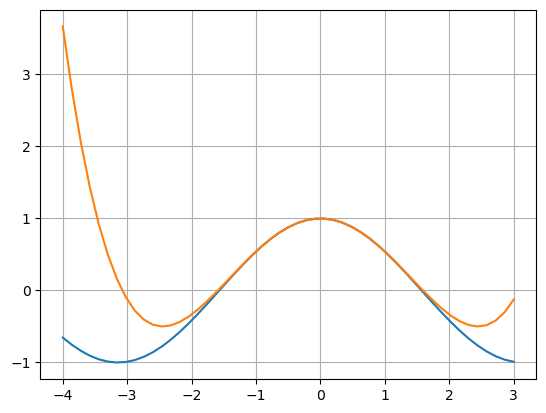

In [19]:
# cos(x)
import numpy as np
import matplotlib.pyplot as plt
import math

X = np.linspace(-4., 3., 51)
print(X)

     
Y = []
#x=1.0
for x in X:   
    valor = 1.0
    for i in range(1,3,1):
        fat = math.factorial(2*i)
        valor = valor + (x**(2*i)*(-1)**i)/fat
        #fat = math.factorial(2*i+1)
        #valor = valor + (x**(2*i+1)*(-1)**i)/fat

        #print (x, valor)
    Y.append(valor)        



plt.plot(X, np.cos(X),X, Y)
plt.grid()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

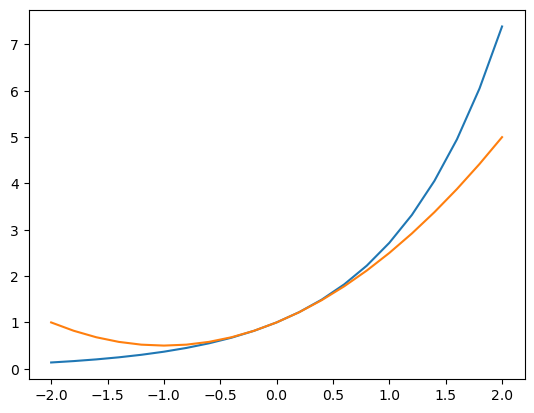

In [20]:
#e^x

X = np.linspace(-2., 2., 21)
#print(X)

Y = []
#x=1.0
for x in X:   
    valor = 1.0
    fat_i = 1.0
    for i in range(1,3,1):
        fat_i = fat_i * i
        valor = valor + (x**i)/fat_i
        #print (x, valor)
    Y.append(valor)        



plt.plot(X, np.exp(X), X, Y)
plt.show